In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir ="/content/drive/MyDrive/Project_data"

In [ ]:
os.listdir(data_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Project_data'

In [ ]:
image_exts= ['.jpeg','.tif','.bmp','.png']

In [ ]:
source_dir1="/content/drive/MyDrive/Project_data/DR/Fundus"
source_dir2="/content/drive/MyDrive/Project_data/DME/Fundus"

In [ ]:
destination_dir1 = "/content/drive/MyDrive/Project/DR"
destination_dir2 = "/content/drive/MyDrive/Project/DME"

In [ ]:
import shutil

In [ ]:
#moving .tif images to destination_dir1
def move_images(source_dir1, destination_dir1):
    for root, dirs, files in os.walk(source_dir1):
        for file in files:
            if file.lower().endswith(('.png', '.tif', '.jpeg')):
                file_path = os.path.join(root, file)
                shutil.move(file_path, os.path.join(destination_dir1, file))
move_images(source_dir1, destination_dir1)

In [ ]:
#moving .tif images to destination_dir2
def move_images(source_dir2, destination_dir2):
    for root, dirs, files in os.walk(source_dir2):
        for file in files:
            # Check if the file is an image file (you can modify this condition based on your file types)
            if file.lower().endswith(('.png', '.tif', '.jpeg')):
                # Construct the full file path
                file_path = os.path.join(root, file)
                # Move the file to the destination directory
                shutil.move(file_path, os.path.join(destination_dir2, file))
move_images(source_dir2, destination_dir2)

In [ ]:
os.listdir(destination_dir1)

In [ ]:
os.listdir(destination_dir2)

In [ ]:
img=cv2.imread(os.path.join('drive/MyDrive/Project','DR','fundus_OD_W0.tif'))
img

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
data_dir='/content/drive/MyDrive/Project'

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img=cv2.inread(image_path)
      tip =imghdr.what(image_path)
      if tip not in image_exts:
        print("image not in ext list {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      #os.remove(image_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Project'

In [ ]:
tf.data.Dataset??

In [ ]:
import numpy as np

In [ ]:
!ls /content/drive/MyDrive/Project

ls: cannot access '/content/drive/MyDrive/Project': No such file or directory


In [ ]:
from PIL import Image

In [ ]:
input_dir = "/content/drive/MyDrive/Project/DR"
output_dir = "/content/drive/MyDrive/first_set/Project1/DR1"
output_format = ".png"

In [ ]:
#to convert images from .tif to .png
def convert_images_in_directory(input_dir, output_dir, output_format):
  os.makedirs(output_dir, exist_ok=True)
  for filename in os.listdir(input_dir):
    if filename.endswith(( ".tif")):
      image_path = os.path.join(input_dir, filename)
      image = Image.open(image_path)
      output_path = os.path.join(output_dir, os.path.splitext(filename)[0] + "." + output_format)
      image.save(output_path)
convert_images_in_directory(input_dir, output_dir, output_format)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Project/DR'

In [ ]:
os.listdir(output_dir)

[]

In [ ]:
input_dir1 = "/content/drive/MyDrive/Project/DME"
output_dir1 = "/content/drive/MyDrive/first_set/Project1/DME1"

In [ ]:
#converting .tif images to .png
def convert_images_in_directory(input_dir1, output_dir1, output_format):
  os.makedirs(output_dir, exist_ok=True)
  for filename in os.listdir(input_dir1):
    if filename.endswith(( ".tif")):
      image_path = os.path.join(input_dir1, filename)
      image = Image.open(image_path)
      output_path = os.path.join(output_dir1, os.path.splitext(filename)[0] + "." + output_format)
      image.save(output_path)
convert_images_in_directory(input_dir1, output_dir1, output_format)

In [ ]:
os.listdir(output_dir1)

['fundus_OS_V4..png',
 'fundus_OD_V22..png',
 'fundus_OS_V20..png',
 'fundus_OD_V20..png',
 'fundus_OS_V22..png',
 'fundus_OD_V4..png',
 'fundus_OD_V3..png',
 'fundus_OS_V7..png',
 'fundus_OD_V7..png',
 'fundus_OS_V3..png',
 'fundus_OD_V17..png',
 'fundus_OD_V10..png',
 'fundus_OD_V26..png',
 'fundus_OS_V10..png',
 'fundus_OS_V17..png',
 'fundus_OS_V26..png',
 'fundus_OD_V25..png',
 'fundus_OD_V14..png',
 'fundus_OS_V25..png',
 'fundus_OS_V14..png',
 'fundus_OD_V18..png',
 'fundus_OD_V13..png',
 'fundus_OS_V18..png',
 'fundus_OS_V13..png',
 'fundus_OD_V16..png',
 'fundus_OS_V16..png',
 'fundus_OD_V19..png',
 'fundus_OD_V11..png',
 'fundus_OD_V21..png',
 'fundus_OS_V21..png',
 'fundus_OS_V11..png',
 'fundus_OS_V19..png',
 'fundus_OD_V24..png',
 'fundus_OS_V24..png',
 'fundus_OS_V1..png',
 'fundus_OD_V12..png',
 'fundus_OS_V12..png',
 'fundus_OD_V15..png',
 'fundus_OS_V15..png',
 'fundus_OD_V1..png',
 'fundus_OD_V26 (1)..png',
 'fundus_OD_V13 (1)..png',
 'fundus_OS_V13 (1)..png',
 'fundu

In [ ]:
#re-executing this line
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Project1')

Found 45 files belonging to 4 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
# Get another batch from the iterator
batch = data_iterator.next()

In [ ]:
#images represented as numpy as array
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# LABELS: 1-DIabetic Retinopathy 0-Diabetic Macular Edema
batch[1]

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

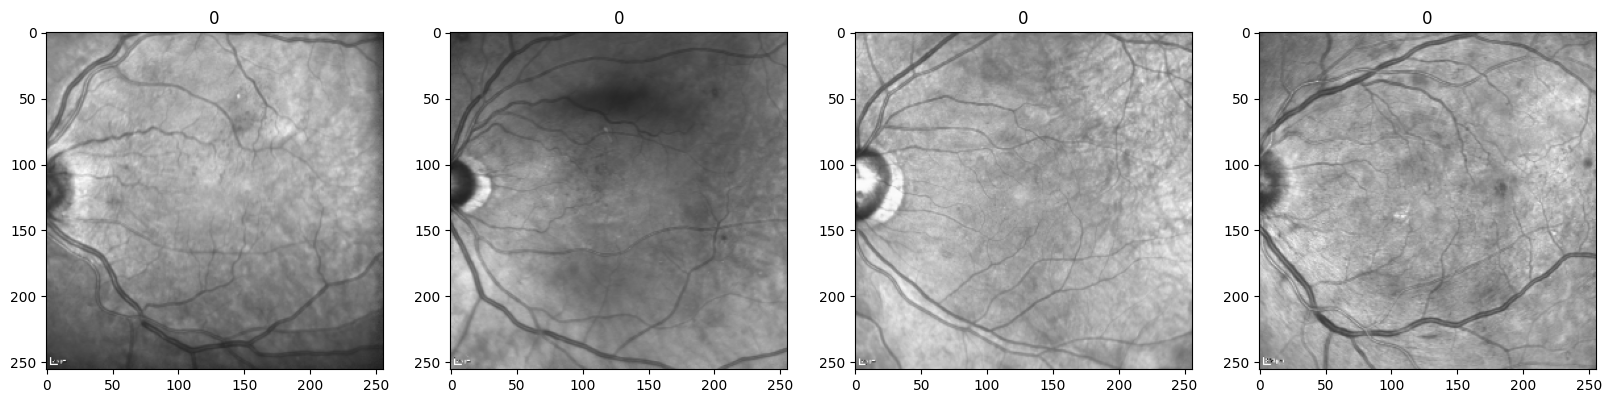

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

1.0

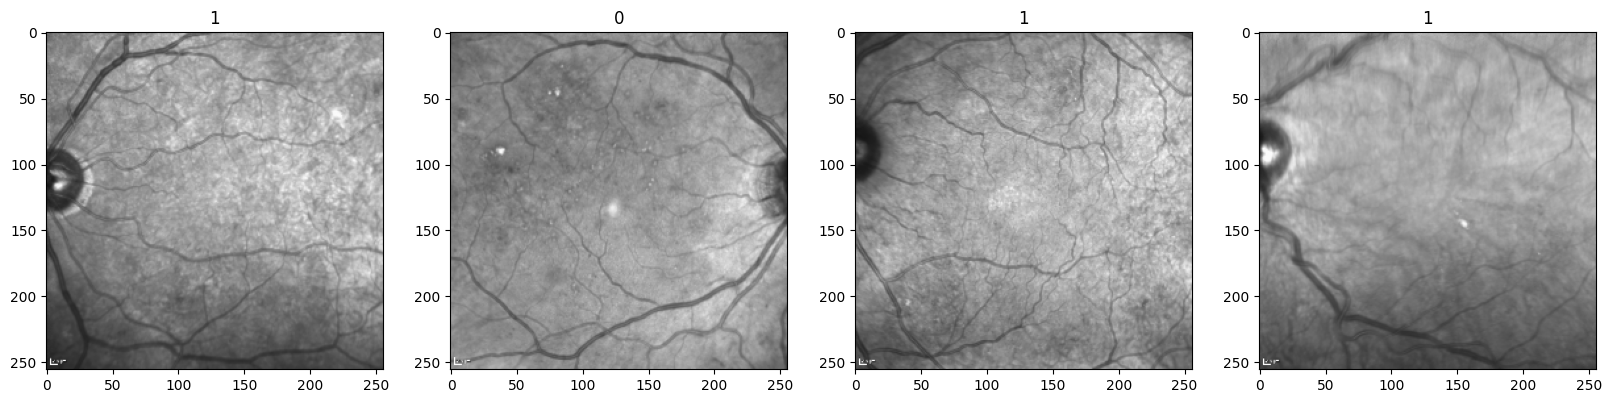

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

3

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)* .2)
test_size = int(len(data)*.1)+1

In [ ]:
print(train_size, val_size, test_size)

2 0 1


In [ ]:
len(test)

1

In [ ]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model= Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3),1, activation='relu') )
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir= '/content/drive/MyDrive/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 5s 3s/step - loss: 0.3412 - accuracy: 0.9062 - val_loss: 0.5244 - val_accuracy: 0.6667
Epoch 2/20
2/2 [==============================] - 7s 3s/step - loss: 0.3647 - accuracy: 0.8125 - val_loss: 0.2224 - val_accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 7s 4s/step - loss: 0.2937 - accuracy: 0.8125 - val_loss: 0.0663 - val_accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 5s 3s/step - loss: 0.2257 - accuracy: 0.9219 - val_loss: 0.1043 - val_accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 5s 3s/step - loss: 0.2218 - accuracy: 0.9219 - val_loss: 0.0522 - val_accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 7s 4s/step - loss: 0.1939 - accuracy: 0.9531 - val_loss: 0.1957 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 5s 3s/step - loss: 0.1639 - accuracy: 0.9531 - val_loss: 0.1905 - val_accuracy: 1.0000
Epoch 8/20
2/2 [=========================

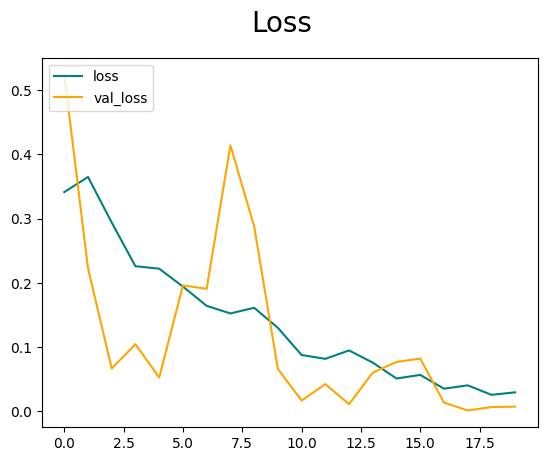

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

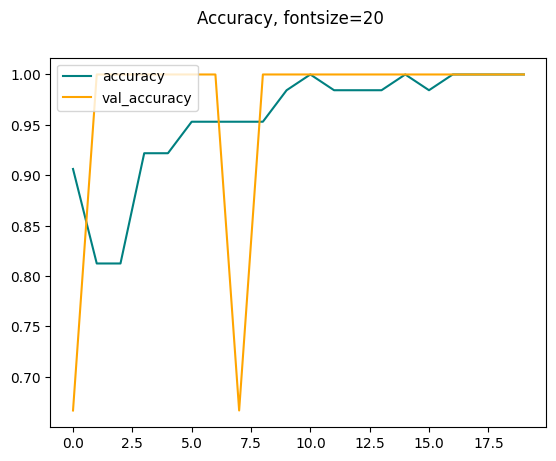

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 164ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [ ]:
import cv2

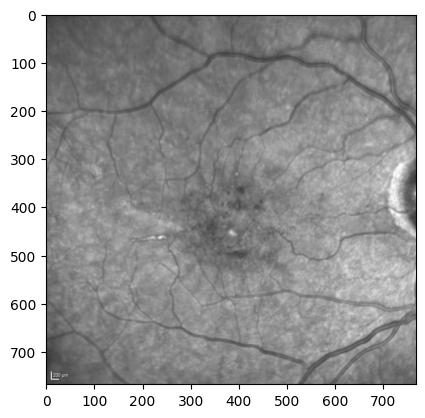

In [ ]:
#new image for DME
img = cv2.imread('/content/drive/MyDrive/Project_data/DME/Data_w_problem/Monthly/0210MOD/V1/OD/fundus_OD_V1.tif')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

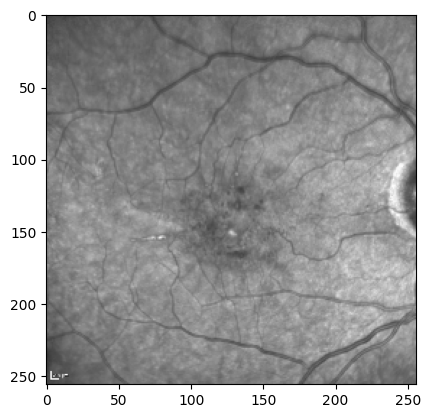

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat=model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 60ms/step


In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
yhat

array([[0.02189162]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print(f'Predicted class is DR')
else:
  print(f'Predicted class is DME')

Predicted class is DME


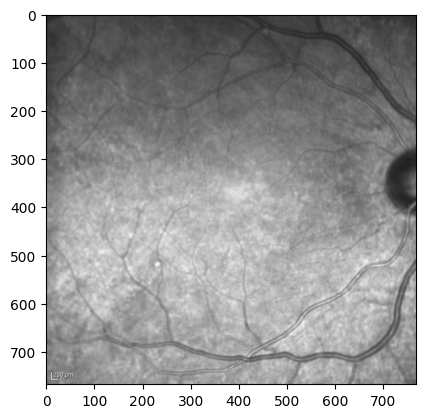

In [ ]:
#new image for DR
img = cv2.imread('/content/drive/MyDrive/Project_data/DR/Fundus/Data_w_problem/01-026/W104/OD/fundus_OD_W104.tif')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


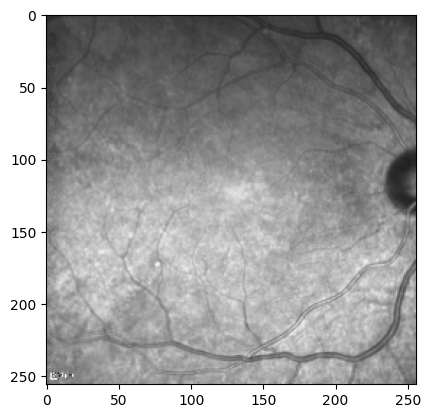

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat1=model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 54ms/step


In [ ]:
yhat1

array([[0.9881394]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print(f'Predicted class is DME')
else:
  print(f'Predicted class is DR')

Predicted class is DR


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/models', 'DR/DME_model.h5'))

NameError: name 'model' is not defined

In [ ]:
new_model= load_model(os.path.join('/content/drive/MyDrive/models/DR/DME_model.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 97ms/step


In [ ]:
yhatnew

array([[0.9881394]], dtype=float32)

In [ ]:
  model.save_weights('model_weights.h5')

In [ ]:
json_string = new_model.to_json()

In [ ]:
with open("DME_model.h5", "w") as f:
  f.write(json_string)

In [ ]:
with open('DME_model.json', "r") as f:
  loaded_json_string = f.read()

In [ ]:
print(loaded_json_string)

In [ ]:
import json

try:
    json.loads(loaded_json_string)
except json.JSONDecodeError:
    print("The JSON string is invalid.")

The JSON string is invalid.


In [ ]:
from tensorflow import keras
new_model = keras.models.model_from_json(loaded_json_string)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
print(new_model,summary())